In [140]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 
from scipy.io import loadmat

In [157]:
#读取数据
y=pd.DataFrame(loadmat('ex3data1.mat')['y'])
X=pd.DataFrame(loadmat('ex3data1.mat')['X'])   
X.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#可视化
test=X.iloc[0,:].values.reshape(20,20)
test.shape

(20, 20)

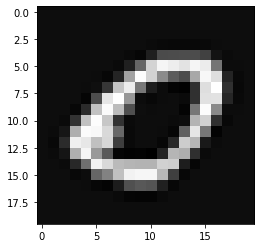

In [71]:
plt.imshow(test,cmap='gray')

In [61]:
data=[]
for i in range(500,510):
    tmp = X.iloc[i,:].values.reshape(20,20)
    data.append(tmp)
test=np.vstack(data)


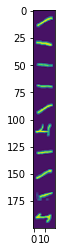

In [62]:
plt.imshow(test)

In [291]:
X=X.values
y=y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [160]:
theta= np.zeros(X.shape[1])

In [228]:
#正则化后的损失函数
def r_cost(theta, X, y, l=1):
    m=X.shape[0]
    cost = np.mean(-y * np.log(sigmoid(X.dot(theta))) - (1 - y) * np.log(1 - sigmoid(X.dot(theta)))) 
    reg = (l/ 2*m) * np.sum(theta[1:]**2)
    return cost + reg

In [229]:
r_cost(theta,X,y,l=3)

-17.051420641776012

In [298]:
#正则化后的梯度
def r_gradient(theta, X, y, l=3):
    m=X.shape[0]
    error = sigmoid(X.dot(theta)) - y.ravel() # np.ravel 将其变为一维arrary
    reg = theta * (l/m)
    return X.T.dot(error)/m +reg 

In [307]:
r_gradient(theta,X,y).shape

(400,)

In [311]:
def logistic_regression(X, y, l=1):
    """generalized logistic regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.zeros(X.shape[1])

    # train it
    res = opt.minimize(fun=r_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    # get trained parameters
    final_theta = res.x

    return final_theta

In [312]:
import scipy.optimize as opt
logistic_regression(X,y)

array([ 0.00000000e+00,  0.00000000e+00,  8.66526473e-10, -3.57870548e-08,
       -2.12048762e-07,  7.90277250e-06,  1.00398518e-05,  4.17014311e-06,
        1.23946540e-06,  1.53327702e-06,  4.60830260e-07, -3.46046573e-07,
       -8.46100810e-07, -1.85830323e-06, -2.11403883e-06, -1.24876244e-06,
       -3.85687821e-07, -2.59387859e-09,  4.09410797e-09,  0.00000000e+00,
        3.03725684e-09, -3.00221889e-08, -1.51932875e-08, -5.71663361e-07,
       -1.03985767e-06,  1.27001725e-05,  4.52691567e-05,  6.32798229e-05,
        4.90303833e-05,  1.37538610e-05, -1.19040909e-05, -1.87646253e-05,
       -2.04872914e-05, -1.58149670e-05, -1.12626748e-05, -6.96550688e-06,
       -3.22732419e-06, -1.89409176e-06, -5.07173525e-07, -1.83790029e-07,
       -2.60556529e-08,  2.92481189e-07, -6.79745559e-07,  3.00716005e-06,
        2.45182875e-05,  1.24938161e-04,  2.70598142e-04,  3.50136700e-04,
        2.63096291e-04,  1.17376854e-04,  5.12782552e-05,  2.46748950e-05,
        8.11884304e-05,  